##Setup Dataset

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
import numpy as np
import os

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/htn19')
# !unzip htn_train.zip

In [7]:
input_size = 256
class_names = ["bird", "boar", "dog", "dragon", "hare", "horse", "monkey", "ox", "ram", "rat", "serpant", "tiger", "none"]
train_dir = "/content/drive/My Drive/Colab Notebooks/htn19/train"
X_train = np.zeros((len(os.listdir(train_dir)), input_size, input_size, 3))
Y_train = np.zeros((len(os.listdir(train_dir)), 13))
image_files = os.listdir(train_dir)
image_files.sort()
count = 0

prev_class = ""
index = -1
for num, file in enumerate(image_files):     
    count += 1   
    if file[0] != prev_class:
        index += 1
        if index > 12:
            index = 12
        label = np.zeros(13)
        label[index] = 1
        print(label, file)

    Y_train[num] = label
    image = cv2.imread(os.path.join(train_dir, file), 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)/255.
    X_train[num] = image
    prev_class = file[0]

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] A1.jpg
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] B1.jpg
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] C1.jpg
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] D1.jpg
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] E1.jpg
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] F1.jpg
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] G1.jpg
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] H1.jpg
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] I1.jpg
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] J1.jpg
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] K1.jpg
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] L1.jpg
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] M1.jpg


In [0]:
test_dir = "/content/drive/My Drive/Colab Notebooks/htn19/test"
X_test = np.zeros((len(os.listdir(test_dir)), input_size, input_size, 3))
Y_test = np.zeros((len(os.listdir(test_dir)), 13))
image_files = os.listdir(test_dir)
image_files.sort()

prev_class = ""
index = -1
for num, file in enumerate(image_files):        
    if file[0] != prev_class:
        index += 1
        if index > 12:
            index = 12
        label = np.zeros(13)
        label[index] = 1
        print(label, file)

    Y_test[num] = label
    image = cv2.imread(os.path.join(test_dir, file), 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)/255.
    X_test[num] = image
    prev_class = file[0]

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] A1.jpg
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] B1.jpg
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] C1.jpg
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] D1.jpg
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] E1.jpg
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] F1.jpg


(7748, 256, 256, 3)
(7748, 13)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


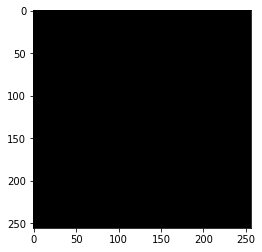

In [0]:
from matplotlib import pyplot as plt

print(X_train.shape)
print(Y_train.shape)
plt.imshow(X_train[0])
print(Y_train[0])

In [0]:
print(X_test.shape)
print(Y_test.shape)
plt.imshow(X_test[0])
print(Y_test[0])

#Keras

##Model from Scratch

###Setup

In [0]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import keras.backend as K

K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 
# !nvidia-smi

In [0]:
def HandSignModel(input_shape):
    # Define the input placeholder as a tensor with shape input_shape. 
    X_input = Input(input_shape)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv01')(X_input)
    X = BatchNormalization(axis = 3, name = 'bn01')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), strides= (2, 2), name='max_pool1')(X)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(128, (3, 3), strides = (2, 2), name = 'conv02')(X)
    X = BatchNormalization(axis = 3, name = 'bn02')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), strides= (2, 2), name='max_pool2')(X)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(256, (3, 3), strides = (1, 1), name = 'conv03')(X)
    X = BatchNormalization(axis = 3, name = 'bn03')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), strides= (2, 2), name='max_pool3')(X)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(512, (3, 3), strides = (1, 1), name = 'conv04')(X)
    X = BatchNormalization(axis = 3, name = 'bn04')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), strides= (2, 2), name='max_pool4')(X)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(512, (3, 3), strides = (1, 1), name = 'conv05')(X)
    X = BatchNormalization(axis = 3, name = 'bn05')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), strides= (2, 2), name='max_pool5')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(4096, activation='relu', name='fc01')(X)
    X = Dense(13, activation='softmax', name='fc02')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HandSignModel')
    
    return model

###Train and Eval

In [0]:
signModel = HandSignModel([input_size, input_size, 3])

In [0]:
# Continue training from previous weights
from keras.models import load_model

signModel = load_model('/content/drive/My Drive/Colab Notebooks/htn19/custom_sign_model_v2.h5')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.preprocessing import image

signModel.compile(optimizer=Adam(lr=0.0001), loss="categorical_crossentropy", metrics = ["accuracy"])

datagen = image.ImageDataGenerator(
    rescale=1./255,
    brightness_range=(0.7, 1.3),
    shear_range=0.1,
    zoom_range=0.1,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
)
it = datagen.flow(X_train, Y_train)
mc = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/htn19/custom_sign_model_v2.h5', verbose=1, monitor='loss',
                     save_best_only=False, save_weights_only=False, mode='auto', period=1)
# signModel.fit_generator(it, validation_data=(X_train, Y_train), steps_per_epoch=len(X_train) // 16,
# 	epochs=2, shuffle=True, callbacks=[mc])
signModel.fit(x=X_train, y=Y_train, epochs=10, batch_size=16, shuffle=True)

In [0]:
preds = signModel.evaluate(x=X_test, y=Y_test)

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

In [0]:
# img_path = 'images/my_image.jpg'

# img = image.load_img(img_path, target_size=(64, 64))
# plt.imshow(img)

# x = image.img_to_array(img)
x = X_train[0]
x = np.expand_dims(x, axis=0)

plt.imshow(X_train[0])
print(class_names[np.argmax(signModel.predict(x))])

In [0]:
signModel.save("/content/drive/My Drive/Colab Notebooks/htn19/custom_sign_model.h5")